<a href="https://colab.research.google.com/github/Riabdulm/Bikes-Ride-Analysis/blob/main/bikesride_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geo-tracked and locked into a network of 692 stations across Chicago. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers who purchase annual memberships are Cyclistic members. 

Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the pricing flexibility helps Cyclistic attract more customers, the management believes that maximizing the number of annual members will be key to the company’s future growth. Also, it will save the company’s acquisition cost of new customers. For that reason, the management team has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members.


## **Objectives of the Analysis** 

Objective of the task is to:
 

*  Understand how annual members of the company and casual riders differ in terms of the company’s bikes usage
*   Make recommendations on how to convert casual riders to annual members

This will be done by analysing the historical data of the company to identify trends in bikes' usage by these two different customer segments.

### **Data Sourcing and Preparation**

The data is a public data located on the web and available for download - https://divvy-tripdata.s3.amazonaws.com/index.html. The data is licenced under the Data Licence Agreement and the data verification is done as agreed in this licence. Personal information cannot be used in order to protect the privacy of the riders.

#### **Data Charactersitics**

The data used is the Cyclistic trip data for 12 months period - November 2021 to October 2022. The complete data for the time period was available for download, therefore, the data is unbiased as the whole population data was collected and not a sample. The total data for the 12-month period is over 5.7 million, which means, there were over 5.7 million rides in that duraction.

### **Data Processing**

**Tools used** include: Microsoft Excel, SQL (Google BigQuery) and Python


**Microsoft Excel**:

1.  Created column for ride_length by subtracting ended_at from started_at time
2.  Created column for day_of_week of the week using started_at column. Weekday command was used to return day as 1-7. Then coded the day with IFS to show day as Sun = 1, Mon = 2 to Sat = 7
3.	Created column for month using started_at_column to return month and coded with IF to show month as string 
4.	Renamed column from member_casual to membership_type
5.	Filtered out rows with empty or irregular data for (ride_id, rideable_type, ride_length, day_of_week, member_casual)


**SQL:**
1. Imported the monthly csv data into SQL for the period Nov 2021 to Oct 2022
2. UNION ALL the monthly data together into a large dataset of 5.7m rows of data and exported to Python for analysis

### **Importing needed Libraries and setting up google colab**

In [ ]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'data-analysis-368804'           # Project ID inserted based on the query results selected to explore
location = 'northamerica-northeast2'        # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

### **Referencing SQL syntax from BigQuery**

Getting the dataset from Google SQL BigQuery 

In [3]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_5242814_18483545f0e')           # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT ride_id as ride_id, rideable_type as ride_type, ride_length as ride_length, day_of_week as day, month as month, membership_type as membership_type
FROM data-analysis-368804.bikesride.nov_2021_bikesride 
UNION ALL

SELECT ride_id as ride_id, rideable_type as ride_type, ride_length as ride_length, day_of_week as day, month as month, membership_type as membership_type
FROM data-analysis-368804.bikesride.dec_2021_bikesride
UNION ALL

SELECT ride_id as ride_id, rideable_type as ride_type, ride_length as ride_length, day_of_week as day, month as month, membership_type as membership_type
FROM data-analysis-368804.bikesride.jan_2022_bikesride
UNION ALL

SELECT ride_id as ride_id, rideable_type as ride_type, ride_length as ride_length, day_of_week as day, month as month, membership_type as membership_type
FROM data-analysis-368804.bikesride.feb_2022_bikesride
UNION ALL

SELECT ride_id as ride_id, rideable_type as ride_type, ride_length as ride_length, day_of_week as day, month as month, 

## Loading data from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery

In [4]:
job = client.get_job('bquxjob_5242814_18483545f0e')                   # Job ID inserted based on the query results selected to explore
bikes_ride = job.to_dataframe()
bikes_ride

,ride_id,ride_type,ride_length,day,month,membership_type
0,4E91A0F20A8FC843,electric_bike,00:08:52,Sun,Jan,member
1,C540BF18E7A4CD3E,electric_bike,00:02:52,Sun,Jan,member
2,48E4A99E846EBD80,electric_bike,00:14:26,Sun,Jan,casual
3,13C01F19851BA82D,electric_bike,00:17:59,Sun,Jan,member
4,CE586E32DC1E2D39,electric_bike,00:17:13,Sun,Jan,member
...,...,...,...,...,...,...
5755501,A21EC4BB5DCBC212,electric_bike,00:06:04,Sat,Nov,member
5755502,EAC2E707BAD458B4,electric_bike,00:39:49,Sat,Nov,casual
5755503,AB15CFE35ACB40F5,electric_bike,00:05:21,Sat,Nov,member
5755504,DC5B24377CE23984,classic_bike,00:24:17,Sat,Nov,casual


## **Data Processing**

### Checking missing values

In [5]:
bikes_ride.isnull().sum()

ride_id            0
ride_type          0
ride_length        0
day                0
month              0
membership_type    0
dtype: int64

No missing values from any of the attributes 

In [6]:
bikes_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5755506 entries, 0 to 5755505
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ride_id          object
 1   ride_type        object
 2   ride_length      dbtime
 3   day              object
 4   month            object
 5   membership_type  object
dtypes: dbtime(1), object(5)
memory usage: 263.5+ MB


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [7]:
bikes_ride.describe()

,ride_id,ride_type,ride_length,day,month,membership_type
count,5755506,5755506,5755506,5755506,5755506,5755506
unique,5755490,3,21763,7,12,2
top,4.85E+13,electric_bike,00:05:23,Sat,July,member
freq,2,2935437,6419,939649,823465,3402563


## Data description showing:

*   3 ride_types (classic, docked and electric) with electric_bike being the most used
*   7 days with Saturday being the most frequent day
*   12 months period with July being the busiest with 823,465 rides
*   2 membership_types (casual and member) with majority of the customers being a member










## **Data Analysis**

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [9]:
bikes_ride['ride_length'].mode() 

0    00:05:23
dtype: dbtime

In [10]:
bikes_ride['ride_length'].min() 


datetime.time(0, 0)

In [11]:
bikes_ride['ride_length'].max() 

datetime.time(23, 59, 57)

*   Most common ride duration was 5 mins 23 seconds
*   The highest ride was for 23 hrs 59 mins 57 seconds



#### Plot for membership_type and time taken to ride 

#### **Visualizing how the different bikes type are used**

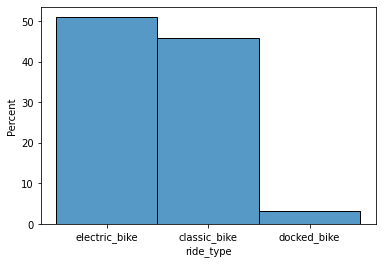

In [12]:
sns.histplot(x="ride_type", data=bikes_ride, stat ="percent") 

Percentage of rides by member and casual riders by ride_type

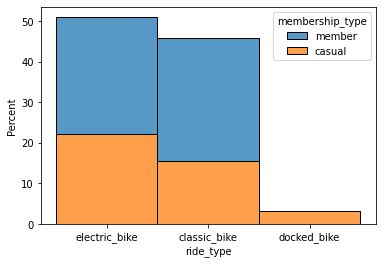

In [30]:
sns.histplot(binwidth=0.5, x="ride_type", hue="membership_type", data=bikes_ride, stat="percent", multiple="stack")

#### **Relationship between day of the week and membership type**

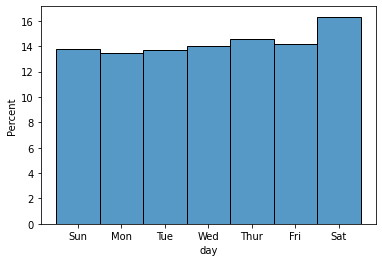

In [14]:
sns.histplot( x="day", data=bikes_ride, stat="percent") 

Percentage of rides by member and casual riders by day

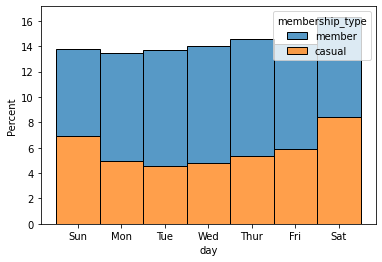

In [22]:
sns.histplot(binwidth=0.5, x="day", hue="membership_type", data=bikes_ride, stat="percent", multiple="stack")

#### **Relationship between memebership type and month**

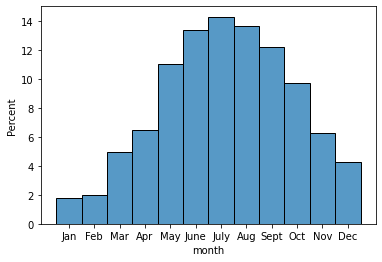

In [32]:
#re-arranging the month for plotting purposes
bikes_ride['month'] = pd.Categorical(bikes_ride['month'], ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"])  

#plotting month by percentage of rides for the year period 
sns.histplot( x="month", data=bikes_ride, stat='percent') 

Percentage of rides by member and casual riders by month

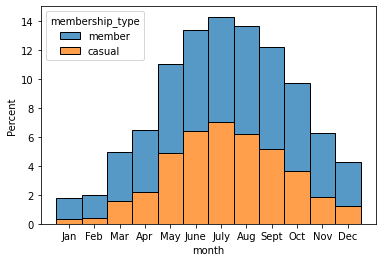

In [26]:
sns.histplot(binwidth=0.5, x="month", hue="membership_type", data=bikes_ride, stat="percent", multiple="stack")

##**Findings**

#### The following are the key findings from the analysis on how the two group of riders (casual and member) differ in terms of the company's bikes usage:


*  The classic and electric bike are utilized by both member and casual rides. However, only the casual users utilize the docked bikes.

*     The casual and member riders maintain similar ratio of users during the week days. However, casual members are more active during the weekends (Saturday and Sunday). This pushed Saturday rides to highest with 16% and casual members accouted for half of that.

*   The casual riders are more frequent during the summer period of June, July, August and September. 
July is the busiest month of the year with 14% of the total percentage of rides. Casual riders account for approximately 7% of these rides in the month of July.





## **Recommendations**

#### For the business to achieve its objective of trying to convert the casual riders to members, the following recommendations are made:



*   The casual riders utilize more docked bikes probably because they have access to more docked stations and find it more accessible and flexible to use. Therefore, more docked bikes and stations should be provided with incentives such as discount, coupon or loyalty points to encourage these casual riders to become members.
*   The marketing strategies designed such as advertisements or promotions should be broadcasted with additional efforts during the weekends to target these casual riders.
*   Also, the summer period should see more promotions and advertisements as this can encourage the casual riders to become member riders.

The company's stakeholders should take these steps to maximize the number of annual members they have as this is more profitable, and it will also reduce the cost of acqusition of new members in the long-term.










### **Additional Analysis:**

Additional analysis could have been done to further gain insights and provide more answers to the management's questions if data where available on the routes of the riders. That is, if there were full information on the starting and ending stations of the riders, we could have found out which routes are most frequent by the different categories of riders.